In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv",sep=',')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


importing the csv file

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

checking out the columns

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

checking out the datatypes of the dataframe

In [6]:
df.shape

(32560, 15)

checking out the shape of the dataframe

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


checking out all the statistical measures of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


checkig out the information of the dataframe

In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

checking out the null values across the columns

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

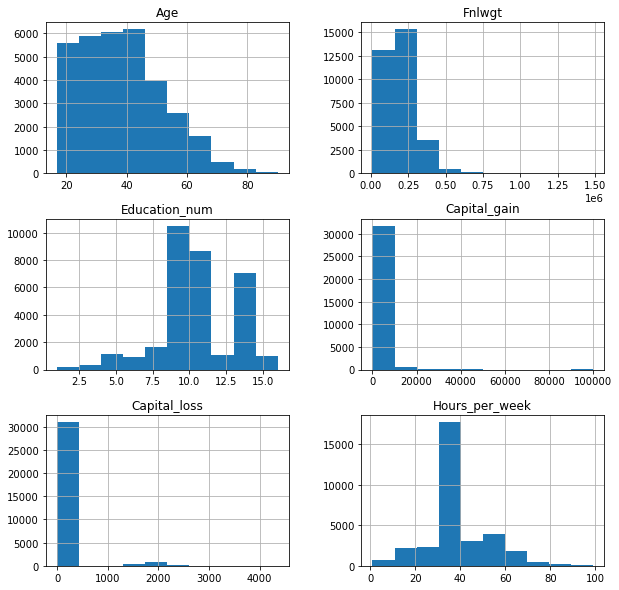

In [10]:
df.hist(figsize=(10,10))

checking out the frequency of values of a perticular columns

<AxesSubplot:xlabel='count', ylabel='Workclass'>

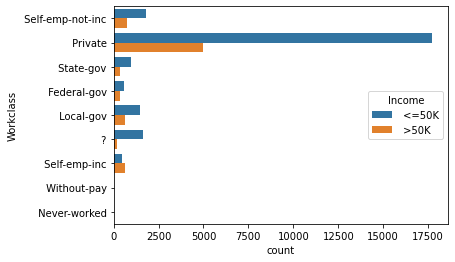

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(y='Workclass', hue='Income', data = df)

the baove graph shows the income level of people in different sectors of workclass

<AxesSubplot:xlabel='count', ylabel='Occupation'>

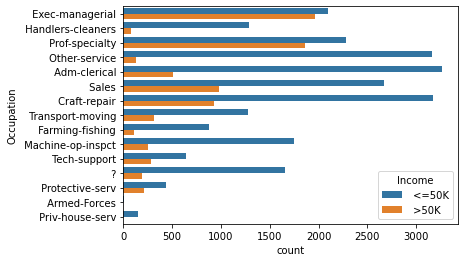

In [12]:
plt.figure(figsize=(18,10))
sns.countplot(y='Occupation', hue='Income', data = df)

the baove graph shows the income level of different occupations

<AxesSubplot:xlabel='Race', ylabel='count'>

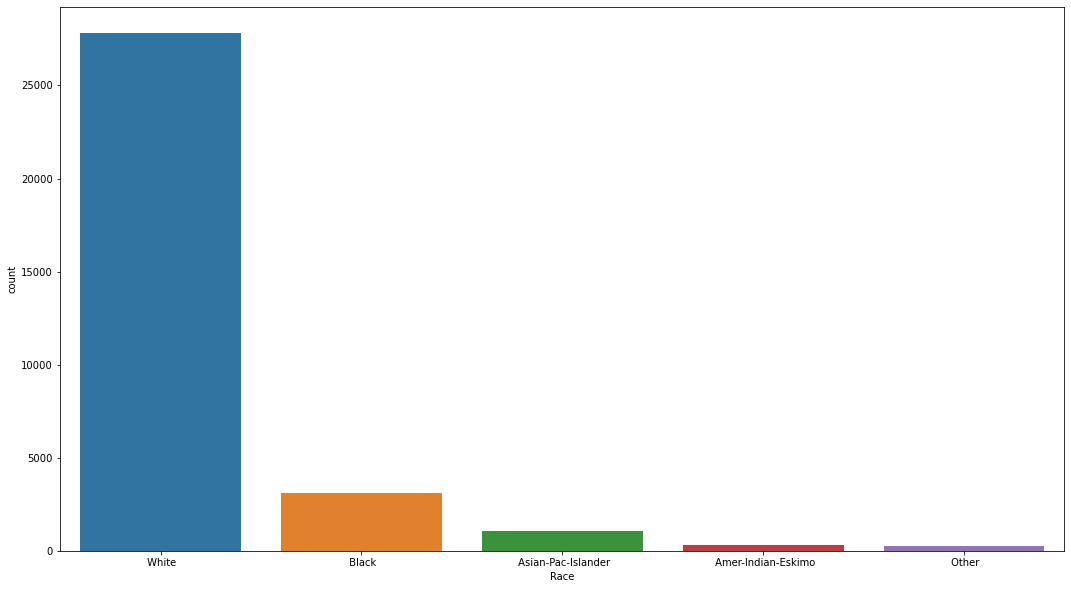

In [14]:
plt.figure(figsize=(18,10))
sns.countplot(df['Race'])

the above bar graph shows the frequency of different races and seems like white people have the high amount of numbers

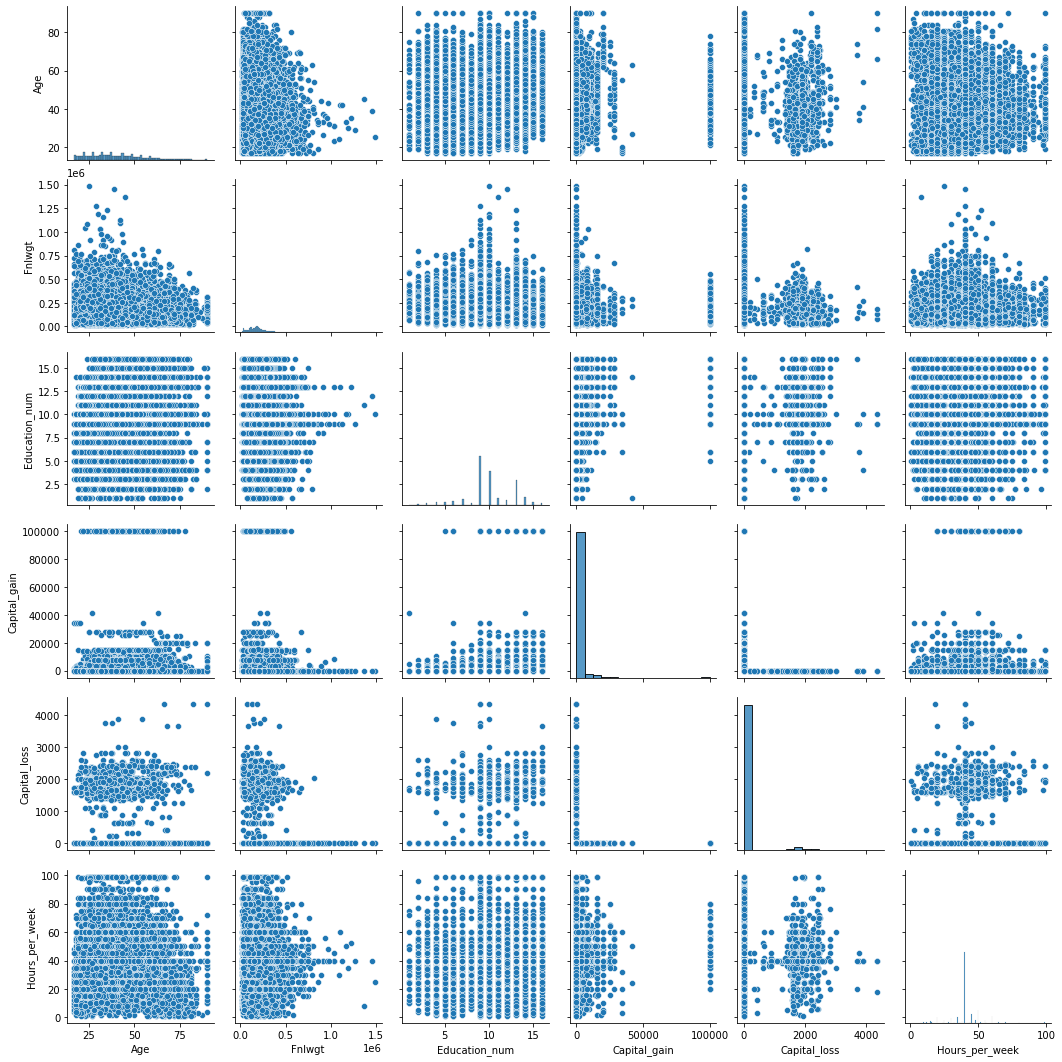

In [26]:
sns.pairplot(df)

Here i tried to visualize the relation between all the columns with respect to each other with pair plot

# Plotting outliers

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

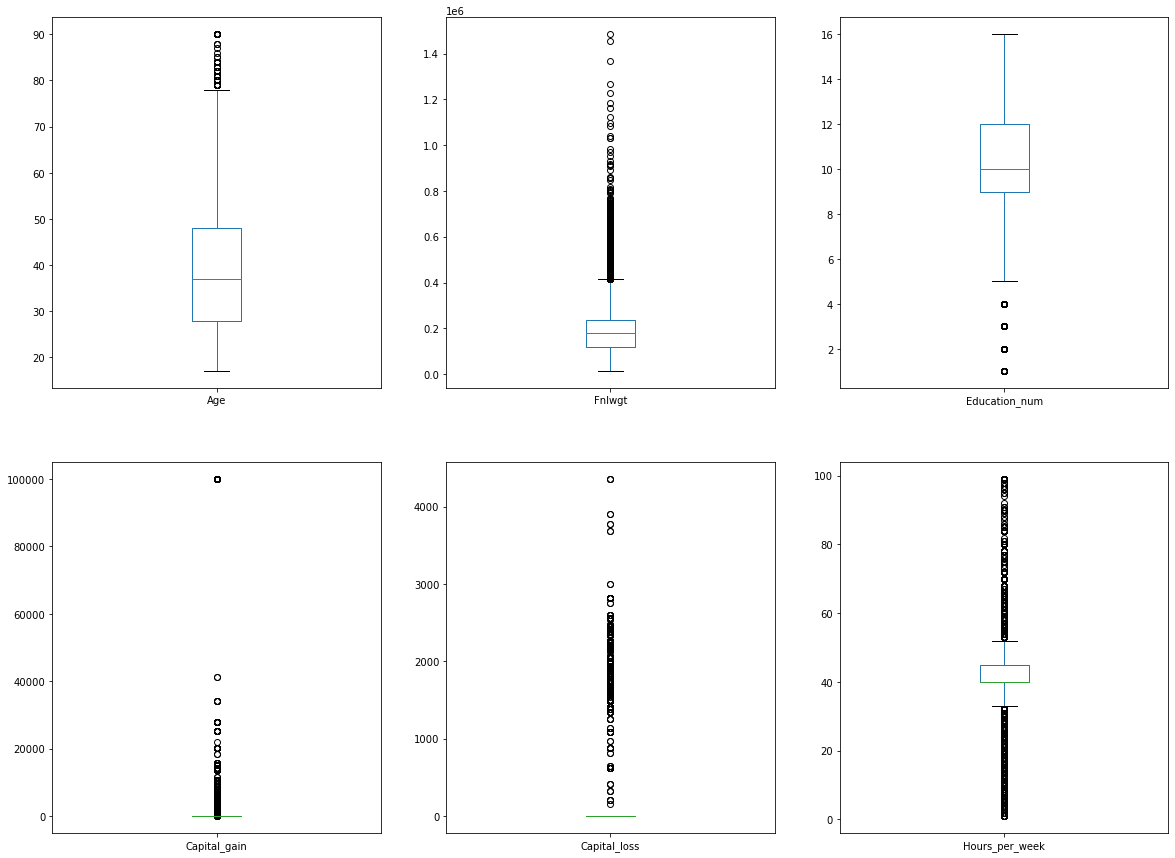

In [29]:
df.plot(kind = 'box',subplots = True,layout=(2,3),figsize = (20,15))

Here i tried to plot the outliers present in the dataset and it looks like the outliers does exist in the data set so we try to remove or minimise the outliers using IQR method

# Applying IQR method

In [30]:
col = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
dfcontcol = df[col]

In [31]:
dfcontcol.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [ ]:
# finding out the quantile of data with continuous columns
Q1 = dfcontcol.quantile(0.25)
Q3 = dfcontcol.quantile(0.75)
IQR = Q3 - Q1

# removing outliers using IQR method
df_new = df[~((dfcontcol < (Q1 - 1.5 * IQR)) |(dfcontcol > (Q3 + 1.5 * IQR))).any(axis=1)]

here i tried to remove the outliers with IQR technique

In [33]:
print(df_new.shape)
print(df.shape)

(18997, 15)
(32560, 15)


In [ ]:
checking out the shape of old dataframe before removing outlier and new dataframe after removing outliers

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

cols = ['Workclass', 'Education', 'Marital_status', 'Occupation','Relationship','Race','Sex','Native_country','Income']
#
# Encode labels of multiple columns at once
#
df_new[cols] = df_new[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
1,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
3,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
6,52,6,209642,8,9,2,4,0,4,1,0,0,45,38,1


here i encoded all the string categorical values into uniue intergers with the help of labeleoncoder

# Check the distribution of skewness

In [37]:
df_new.skew()

Age               0.435155
Workclass        -0.638891
Fnlwgt            0.409966
Education        -0.790257
Education_num     0.261112
Marital_status   -0.037393
Occupation        0.206010
Relationship      0.817340
Race             -2.333145
Sex              -0.719090
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    1.067612
Native_country   -3.834320
Income            1.411828
dtype: float64

In [39]:
skew = ['Age','Fnlwgt','Education_num','Occupation','Relationship','Hours_per_week']
for col in skew:
    if df_new.skew().loc[col]>0.055:
        df_new[col] = np.log1p(df_new[col])

here i tried to check the skewness across the column

<AxesSubplot:>

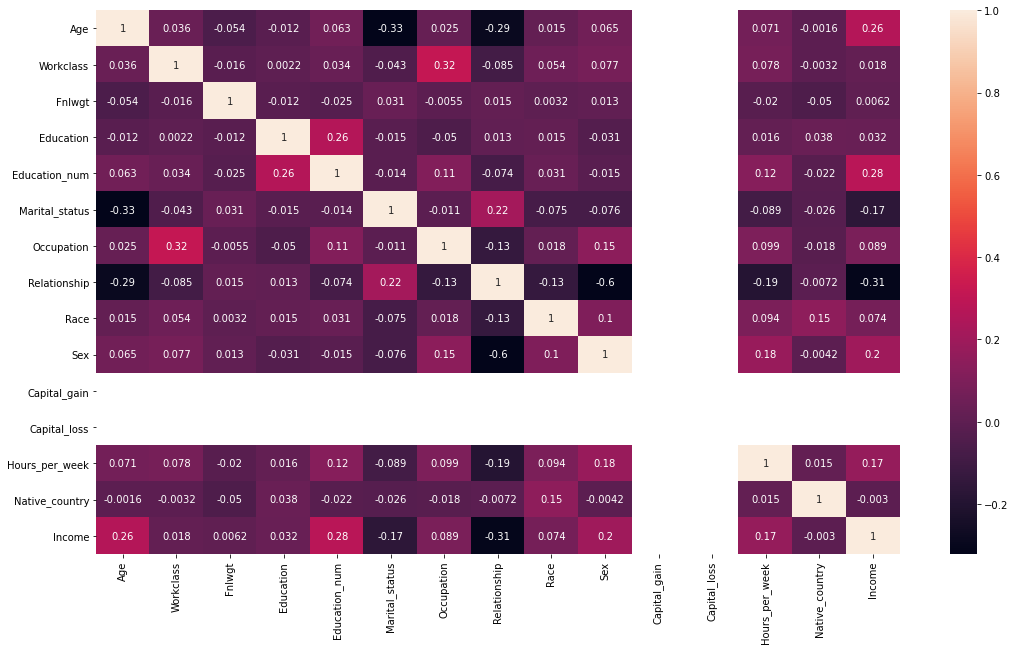

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot = True,robust = True)

here i ploted the heatmap to check the multicolinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

           feature         VIF
0              Age  153.235242
1        Workclass   10.123241
2           Fnlwgt  330.803763
3        Education    9.017499
4    Education_num  175.445157
5   Marital_status    4.304074
6       Occupation    8.282004
7     Relationship    3.740191
8             Race   19.586374
9              Sex    4.930839
10    Capital_gain         NaN
11    Capital_loss         NaN
12  Hours_per_week  620.716471
13  Native_country   24.946089
14          Income    1.549521


here i used vif to show the number of multicolinearity within the columns

In [43]:
df_new.drop(columns = ['Education_num'],axis = 1,inplace = True)

now here i deleted education_num column to reduce the multicolinearity

# Preprocessing

In [44]:
# now split the data into feature and target variables
x = df_new.drop(columns = ['Income'])
y = df_new['Income']

here i split the new dataset into x an y

## checking out imbalancing

<AxesSubplot:xlabel='Income', ylabel='count'>

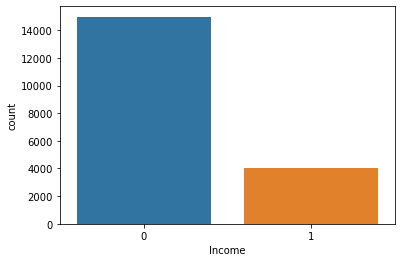

In [45]:
sns.countplot(y)

here i checked is there any imbalace data in the target variable and yes there is imbalance data

In [46]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)
print("Size of x-sample :", x.shape)
print("Size of y-sample :", y.shape)

Size of x-sample : (29952, 13)
Size of y-sample : (29952, 1)


here i reduced the imbalanced data with the smote technique

In [47]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_sample)

here i used standard scalar to scale the feature columns

In [60]:
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_sample,test_size = .25,random_state = 63)

here i split the feature variable and target variable into training and test set

## Because the target variable has catagories so we could use following models

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [62]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

model = [lr,rfc,dt,knn]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression() is 0.7220886752136753
[[2535 1233]
 [ 848 2872]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      3768
           1       0.70      0.77      0.73      3720

    accuracy                           0.72      7488
   macro avg       0.72      0.72      0.72      7488
weighted avg       0.72      0.72      0.72      7488

Accuracy score of RandomForestClassifier() is 0.8802083333333334
[[3238  530]
 [ 367 3353]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3768
           1       0.86      0.90      0.88      3720

    accuracy                           0.88      7488
   macro avg       0.88      0.88      0.88      7488
weighted avg       0.88      0.88      0.88      7488

Accuracy score of DecisionTreeClassifier() is 0.8344017094017094
[[3091  677]
 [ 563 3157]]
              precision    recall  f1-score   support

           0       

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [63]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x,y,cv =10)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.7885986253152629
cv score of RandomForestClassifier() is 0.8326580471716417
cv score of DecisionTreeClassifier() is 0.7772807849006401
cv score of KNeighborsClassifier() is 0.8166560793769573


i used cross_validation_score to check how wel the model is working and Looks like KNeighbors model is giving the best score

## Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size':[5,10,15,20,25,30,35,40]}
knn= KNeighborsClassifier()
clf = GridSearchCV(estimator = knn,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'leaf_size': 5,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [68]:
knn2 = KNeighborsClassifier(leaf_size= 5,
                         metric = 'manhattan',
                         n_neighbors = 5,
                         weights = 'distance')
knn2.fit(x_train,y_train)
print('training score: ',knn2.score(x_train,y_train))
print('testing score: ',knn2.score(x_test,y_test))

0.9999554843304843
0.8532318376068376


Now Here i used the required parameter in KNeighborsClassifier and tries to increase the accuracy

In [73]:
pred_final = knn2.predict(x_test)
print(accuracy_score(y_test,pred_final))

0.8532318376068376


and here is our final predicting accuracy

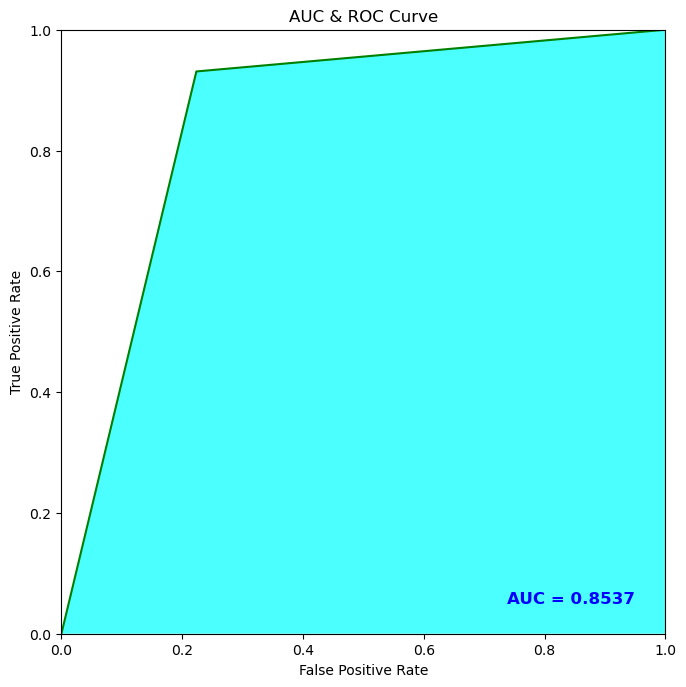

In [76]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_final)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_final)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='cyan', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

here i ploted the AUC & ROC CURVE

# Now we dump the final output

In [ ]:
import pickle
filename = 'cencus_income_project.pkl'
pickle.dump(knn2,open(filename,'wb'))